In [0]:
import torch
from torch import nn
from torchvision import datasets,transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = datasets.MNIST('~/.pytorch/MNIST_data',train=True,transform=transform)
data = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)                                                                   

In [11]:
model = nn.Sequential(nn.Linear(28*28,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Create an omtimizer to do Gradient Descent
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

epochs = 10
for e in range(epochs):
  running_loss = 0
  for images, labels in data:
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad()
    # forward propogate
    output = model.forward(images)
    
    # Calculate loss
    loss = criterion(output, labels)
    
    loss.backward()
    
    optimizer.step()
    
    running_loss += loss.item()
    
  else:
    print(f"training loss: {running_loss/len(data)}")
    
    

training loss: 1.074556202204751
training loss: 0.38647809106785097
training loss: 0.3267657434635325
training loss: 0.29450924745373636
training loss: 0.26901126533810266
training loss: 0.2463449250612813
training loss: 0.22640620062012534
training loss: 0.20773362668195386
training loss: 0.19218029615991533
training loss: 0.17774308953426285


In [14]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 576x396 with 0 Axes>

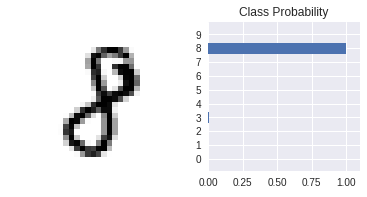

In [19]:
#import helper

images, labels = next(iter(data))

img = images[10].view(1,784)

with torch.no_grad():
  logits = model.forward(img)
  
ps = torch.nn.functional.softmax(logits, dim=1)
view_classify(img.view(1,28,28),ps)